<a href="https://colab.research.google.com/github/imashoodnasir/Breast-Cancer-Classification-for-Histopathological-Images/blob/main/MRI_Hippocampus_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
import csv
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [ ]:
# Configure kaggle
os.chdir('/root/')
!mkdir -p .kaggle
os.chdir('/root/.kaggle')
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Y-o0TVcjehM8SZB3Nt8U3xkyeQu-Nse-' -O kaggle.json > /dev/null 2>&1
!ls /root/.kaggle

# Set permissions 
!chmod 600 /root/.kaggle/kaggle.json

# Create data folder
os.chdir('/content/')

In [ ]:
# Download data
!pip install -q kaggle
!kaggle datasets download -d sabermalek/mrihs

In [ ]:
!unzip '/content/mrihs.zip' -d '/content/dataset/'

In [15]:
Label35_Path = Path("/content/dataset/label/35label")
Image35_Path = Path("/content/dataset/original/35")

In [16]:
Label_Path = list(Label35_Path.glob(r"**/*.jpg"))
Image_Path = list(Image35_Path.glob(r"**/*.jpg"))

In [17]:
print("LABEL LEN:",len(Label_Path))
print("---"*10)
print("IMAGE LEN:",len(Image_Path))

LABEL LEN: 13230
------------------------------
IMAGE LEN: 6615


In [18]:
Label_Series = pd.Series(Label_Path,name="LABEL").astype(str)
Image_Series = pd.Series(Image_Path,name="IMAGE").astype(str)

In [19]:
print("LABEL LEN:",len(Label_Series))
print("---"*10)
print("IMAGE LEN:",len(Image_Series))

LABEL LEN: 13230
------------------------------
IMAGE LEN: 6615


In [20]:
print("LABEL TYPE:",type(Label_Series))
print("---"*10)
print("IMAGE TYPE:",type(Image_Series))

LABEL TYPE: <class 'pandas.core.series.Series'>
------------------------------
IMAGE TYPE: <class 'pandas.core.series.Series'>


In [21]:
Split_Params_For_LABEL = "35label/"
Split_Params_For_IMG = "35/"

In [22]:
L_Main_Path,L_Target_Path = Label_Series[0].split(Split_Params_For_LABEL)
I_Main_Path,I_Target_Path = Image_Series[0].split(Split_Params_For_IMG)

In [23]:
print("LABEL MAIN: ",L_Main_Path)
print("LABEL TARGET: ",L_Target_Path)
print("---"*20)
print("IMG MAIN: ",I_Main_Path)
print("IMG TARGET: ",I_Target_Path)


LABEL MAIN:  /content/dataset/label/
LABEL TARGET:  ADNI_094_S_4460_283573_tal_noscale/ADNI_094_S_4460_283573_L/ADNI_094_S_4460_283573_L_082.jpg
------------------------------------------------------------
IMG MAIN:  /content/dataset/original/
IMG TARGET:  ADNI_094_S_4460_283573_tal_noscale/ADNI_094_S_4460_283573_tal_noscale_052.jpg


In [24]:
Common_Params = "/"

In [25]:
Label_Path_Before,Label_Path_Middle,Label_Path_After = L_Target_Path.split(Common_Params)
IMG_Path_Before,IMG_Path_After = I_Target_Path.split(Common_Params)

In [26]:
print("LABEL BEFORE: ",Label_Path_Before)
print("LABEL MIDDLE: ",Label_Path_Middle)
print("LABEL AFTER: ",Label_Path_After)
print("---"*20)
print("IMG BEFORE: ",IMG_Path_Before)
print("IMG AFTER: ",IMG_Path_After)

LABEL BEFORE:  ADNI_094_S_4460_283573_tal_noscale
LABEL MIDDLE:  ADNI_094_S_4460_283573_L
LABEL AFTER:  ADNI_094_S_4460_283573_L_082.jpg
------------------------------------------------------------
IMG BEFORE:  ADNI_094_S_4460_283573_tal_noscale
IMG AFTER:  ADNI_094_S_4460_283573_tal_noscale_052.jpg


In [27]:
List_Split_Params = "_"

In [28]:
Label_Path_Split = Label_Path_After.split(List_Split_Params)
IMG_Path_Split = IMG_Path_After.split(List_Split_Params)

In [29]:
print("LABEL LIST: ",Label_Path_Split)
print("IMG LIST: ",IMG_Path_Split)
print("---"*20)
print("LABEL TARGET: ",Label_Path_Split[-2])
print("IMG TARGET: ",IMG_Path_Split[-1])

LABEL LIST:  ['ADNI', '094', 'S', '4460', '283573', 'L', '082.jpg']
IMG LIST:  ['ADNI', '094', 'S', '4460', '283573', 'tal', 'noscale', '052.jpg']
------------------------------------------------------------
LABEL TARGET:  L
IMG TARGET:  052.jpg


In [30]:
if Label_Path_Split[-2] == "L":
    
    print("IT'S LEFT")
            
elif Label_Path_Split[-2] == "R":
     
    print("IT'S RIGHT")

IT'S LEFT


In [31]:
L_IMG = []
R_IMG = []
Total_IMG = []

Split_Params_For_LABEL = "35label/"
Split_Params_For_IMG = "35/"

In [32]:
Common_Params = "/"

List_Split_Params = "_"

In [33]:
for label_x,image_x in zip(Label_Series,Image_Series):
    
    try:
        
        L_Main_Path,L_Target_Path = label_x.split(Split_Params_For_LABEL)
        I_Main_Path,I_Target_Path = image_x.split(Split_Params_For_IMG)

        Label_Path_Before,Label_Path_Middle,Label_Path_After = L_Target_Path.split(Common_Params)
        IMG_Path_Before,IMG_Path_After = I_Target_Path.split(Common_Params)

        Label_Path_Split = Label_Path_After.split(List_Split_Params)
        IMG_Path_Split = IMG_Path_After.split(List_Split_Params)


        if Label_Path_Split[-2] == "L":

            L_IMG.append(label_x)
            Total_IMG.append(image_x)
            
        elif Label_Path_Split[-2] == "R":
            
            Total_IMG.append(image_x)
            R_IMG.append(label_x)
            
        else:
            print("SOMETHING IS WRONG!")
            
    except:
        print("LABEL: ",label_x)
        print("IMG: ",image_x)

In [34]:
print("IMG :",len(Total_IMG))
print("LABEL L:",len(L_IMG))
print("LABEL R:",len(R_IMG))

IMG : 6615
LABEL L: 3402
LABEL R: 3213


In [35]:
Sort_L = sorted(L_IMG)
Sort_R = sorted(R_IMG)
Sort_IMG = sorted(Total_IMG)

In [36]:
print(Sort_L[0])
print(Sort_R[0])
print(Sort_IMG[0])

/content/dataset/label/35label/ADNI_002_S_0685_18211/ADNI_002_S_0685_18211_L/ADNI_002_S_0685_18211_L_001.jpg
/content/dataset/label/35label/ADNI_002_S_0685_18211/ADNI_002_S_0685_18211_R/ADNI_002_S_0685_18211_R_001.jpg
/content/dataset/original/35/ADNI_002_S_0685_18211_tal_noscale/ADNI_002_S_0685_18211_tal_noscale_001.jpg


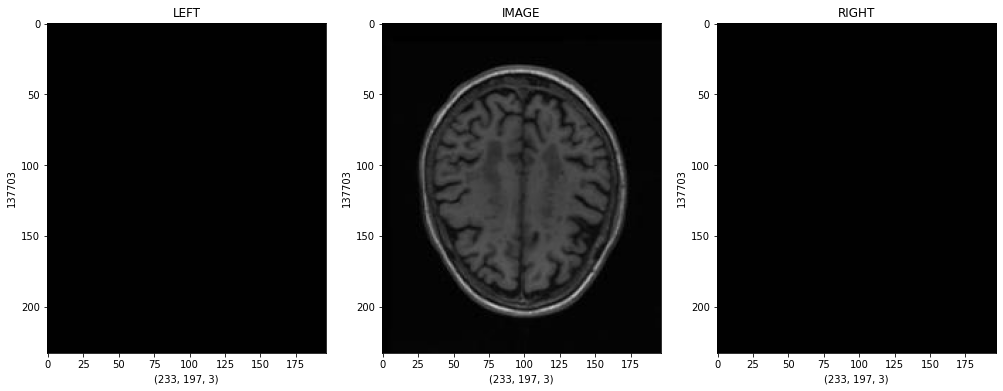

In [37]:
figure,axis = plt.subplots(1,3,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[100]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[100]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[100]),cv2.COLOR_BGR2RGB)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

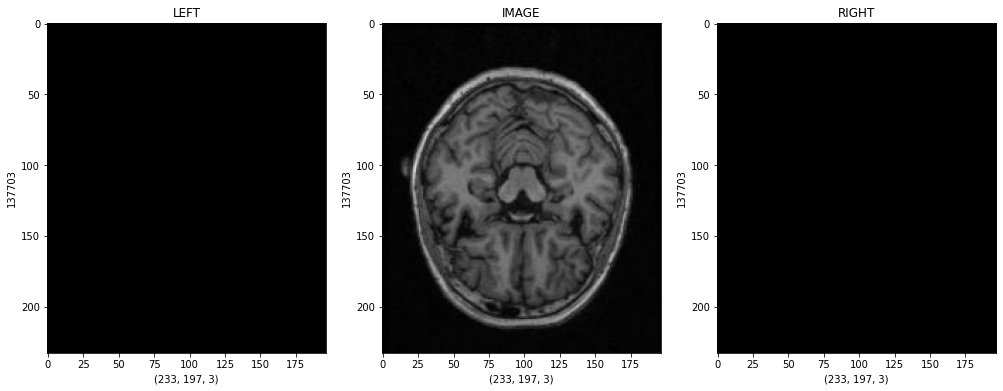

In [38]:
figure,axis = plt.subplots(1,3,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1000]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1000]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1000]),cv2.COLOR_BGR2RGB)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

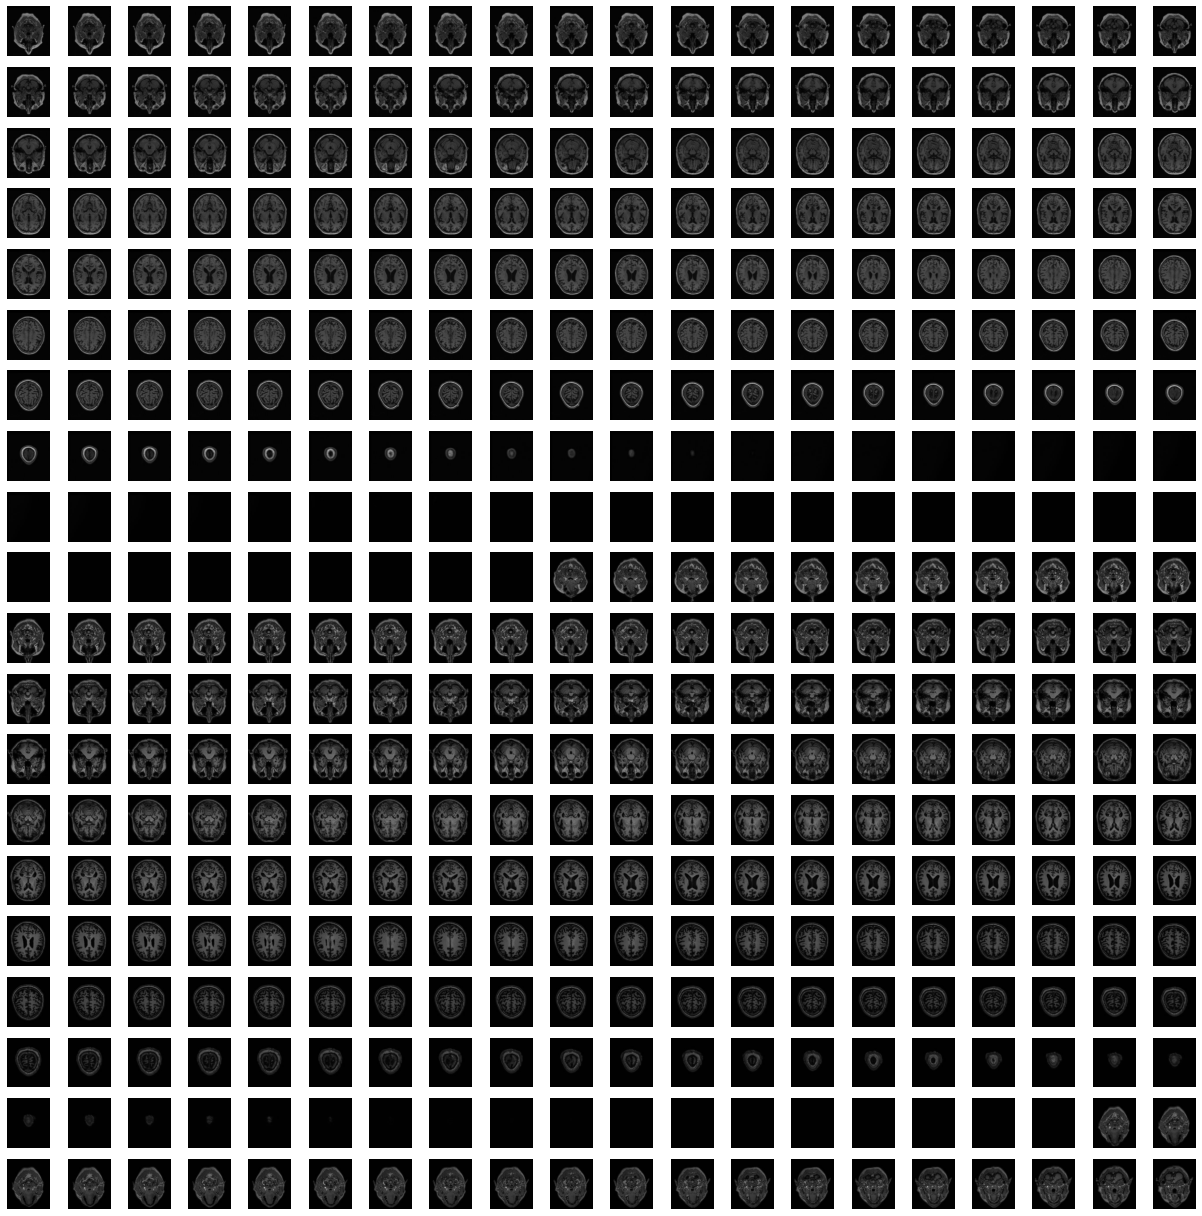

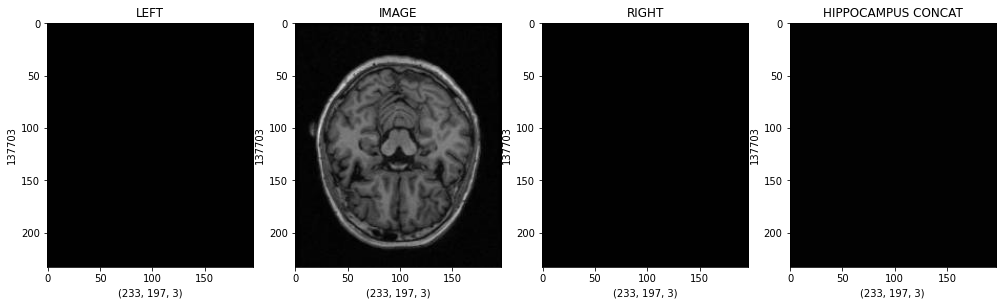

In [39]:
figure,axis = plt.subplots(20,20,figsize=(17,17))

for indexing,operations in enumerate(axis.flat):
    
    Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[indexing]),cv2.COLOR_BGR2RGB)
    
    operations.imshow(Example_IMG)
    operations.axis("off")

plt.tight_layout()
plt.show

figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1000]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1000]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1000]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Hıppocampus_Concat.shape)
axis[3].set_ylabel(Hıppocampus_Concat.size)
axis[3].set_title("HIPPOCAMPUS CONCAT")
axis[3].imshow(Hıppocampus_Concat)

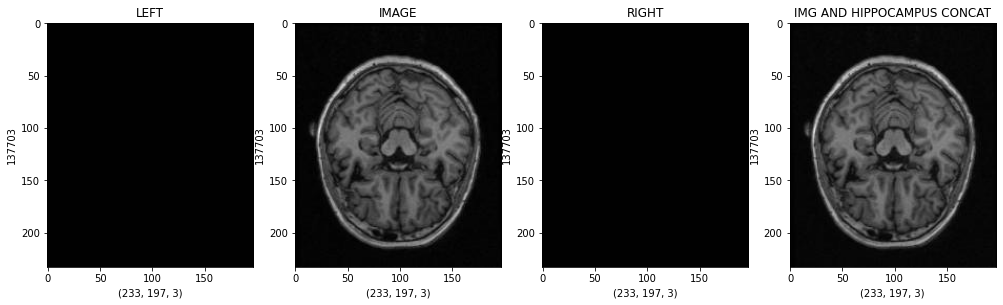

In [42]:
figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1000]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1000]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1000]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

Main_Concat = cv2.addWeighted(Example_IMG,1,Hıppocampus_Concat,1,0.2)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Main_Concat.shape)
axis[3].set_ylabel(Main_Concat.size)
axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT")
axis[3].imshow(Main_Concat)

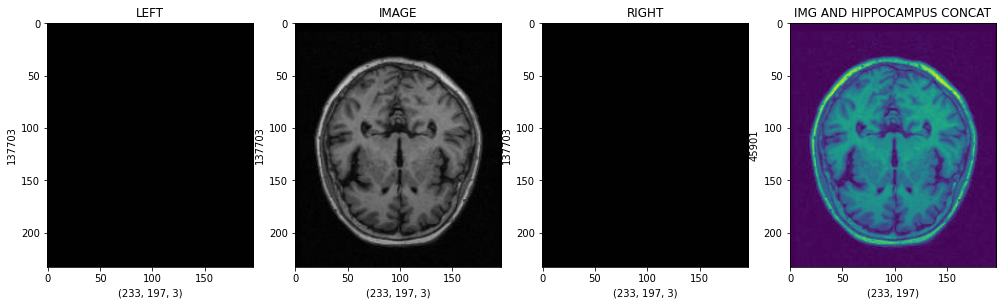

In [44]:
figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1010]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1010]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1010]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

Main_Concat = cv2.addWeighted(Example_IMG[:,:,0],1,Hıppocampus_Concat[:,:,0],1,0.2)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Main_Concat.shape)
axis[3].set_ylabel(Main_Concat.size)
axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT")
axis[3].imshow(Main_Concat)

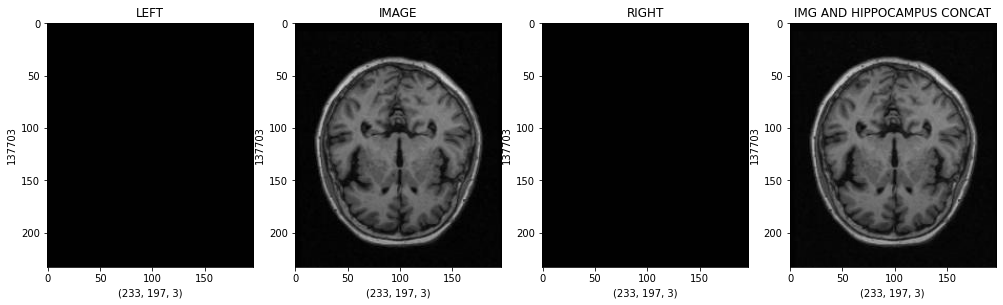

In [45]:
figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1010]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1010]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1010]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

Main_Concat = cv2.addWeighted(Example_IMG,1,Hıppocampus_Concat,1,0.2)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Main_Concat.shape)
axis[3].set_ylabel(Main_Concat.size)
axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT")
axis[3].imshow(Main_Concat)

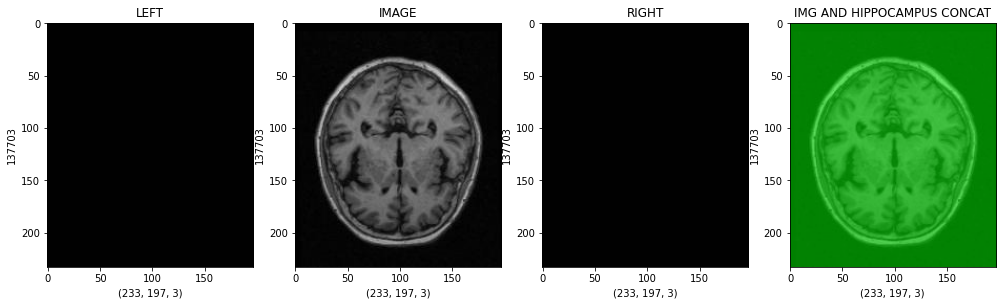

In [46]:
figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1010]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1010]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1010]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

Copy_Main = Example_IMG.copy()
Copy_Main[Hıppocampus_Concat[:,:,0] == 1] = [255,0,0]
Copy_Main[Hıppocampus_Concat[:,:,0] == 2] = [0,255,0]
    
Copy_Main_Two = Example_IMG.copy()
Blend_Image = cv2.addWeighted(Copy_Main,0.5,Copy_Main_Two,0.5,0,Copy_Main_Two)


axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Blend_Image.shape)
axis[3].set_ylabel(Blend_Image.size)
axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT")
axis[3].imshow(Blend_Image)

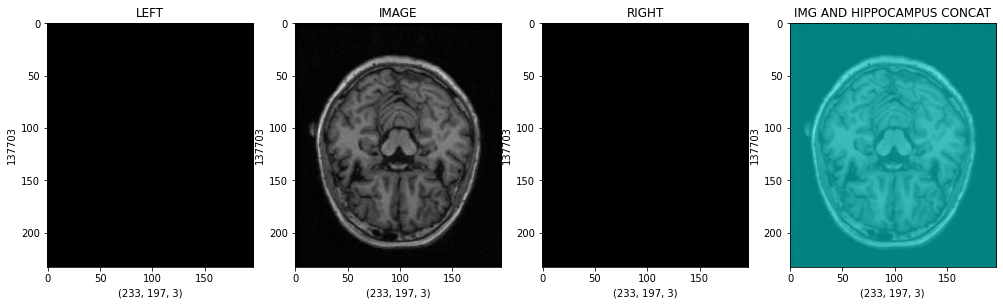

In [47]:
figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1000]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1000]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1000]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

Copy_Main = Example_IMG.copy()
Copy_Main[Hıppocampus_Concat[:,:,0] == 1] = [255,0,0]
Copy_Main[Hıppocampus_Concat[:,:,0] == 2] = [0,255,255]
    
Copy_Main_Two = Example_IMG.copy()
Blend_Image = cv2.addWeighted(Copy_Main,0.5,Copy_Main_Two,0.5,0,Copy_Main_Two)


axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Blend_Image.shape)
axis[3].set_ylabel(Blend_Image.size)
axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT")
axis[3].imshow(Blend_Image)

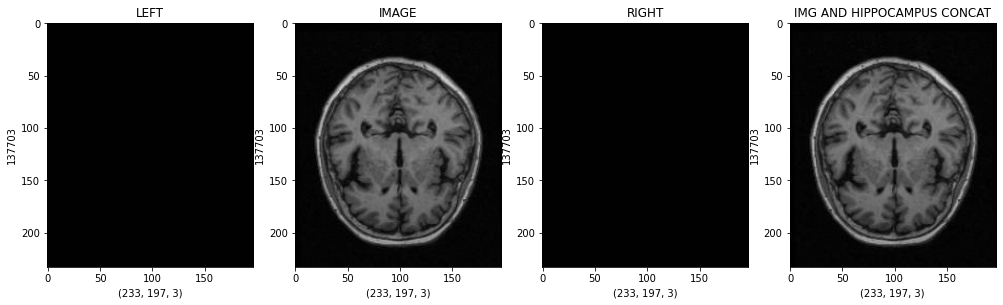

In [51]:
figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1010]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1010]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1010]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

Copy_Main = Example_IMG.copy()
Copy_Main[Hıppocampus_Concat[:,:,0] == 1] = [255,0,0]
    
Copy_Main_Two = Example_IMG.copy()
Blend_Image = cv2.addWeighted(Copy_Main,0.5,Copy_Main_Two,0.5,0,Copy_Main_Two)


axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Blend_Image.shape)
axis[3].set_ylabel(Blend_Image.size)
axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT")
axis[3].imshow(Blend_Image)

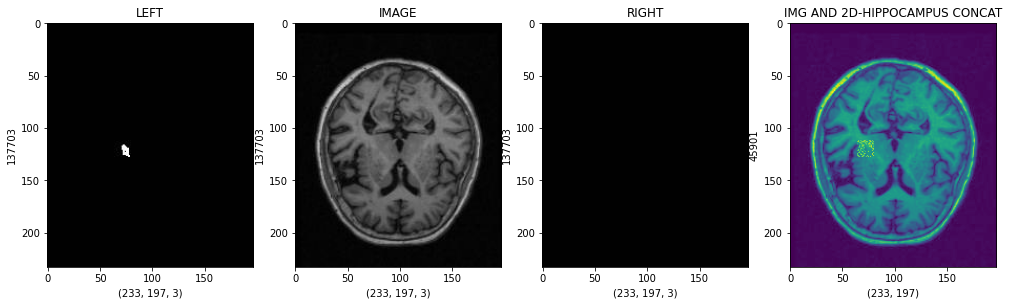

In [52]:
figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1015]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1015]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1015]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

Copy_Main = Example_IMG.copy()
Copy_Main[Hıppocampus_Concat[:,:,0] == 1] = [255,0,0]
    
Copy_Main_Two = Example_IMG.copy()
Blend_Image = cv2.addWeighted(Copy_Main,0.5,Copy_Main_Two,0.5,0,Copy_Main_Two)


axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Blend_Image[:,:,0].shape)
axis[3].set_ylabel(Blend_Image[:,:,0].size)
axis[3].set_title("IMG AND 2D-HIPPOCAMPUS CONCAT")
axis[3].imshow(Blend_Image[:,:,0])

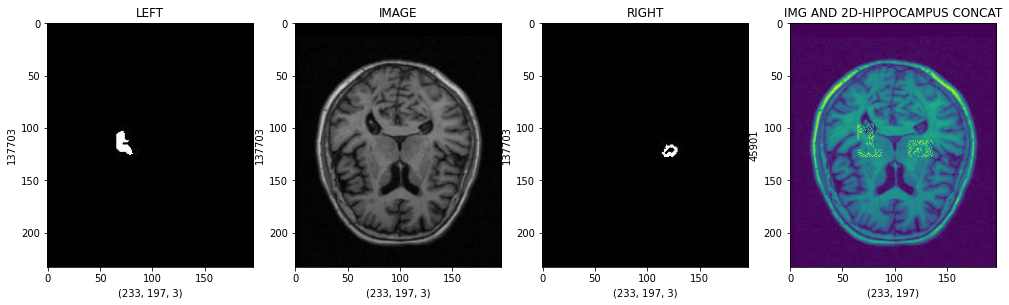

In [53]:
figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1020]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1020]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1020]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

Copy_Main = Example_IMG.copy()
Copy_Main[Hıppocampus_Concat[:,:,0] == 1] = [255,0,0]
    
Copy_Main_Two = Example_IMG.copy()
Blend_Image = cv2.addWeighted(Copy_Main,0.5,Copy_Main_Two,0.5,0,Copy_Main_Two)


axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Blend_Image[:,:,0].shape)
axis[3].set_ylabel(Blend_Image[:,:,0].size)
axis[3].set_title("IMG AND 2D-HIPPOCAMPUS CONCAT")
axis[3].imshow(Blend_Image[:,:,0])

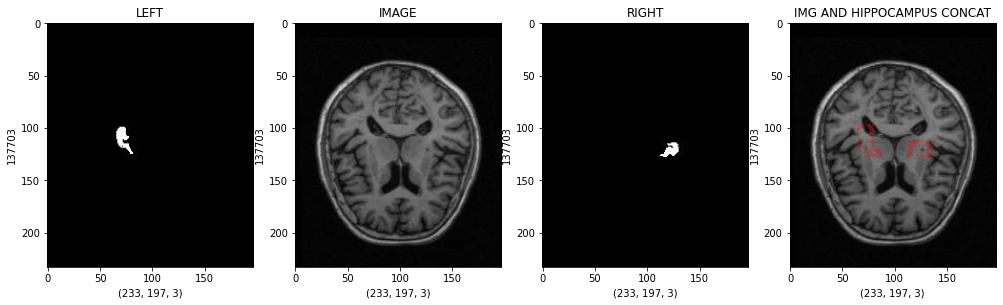

In [54]:
figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1022]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1022]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1022]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

Copy_Main = Example_IMG.copy()
Copy_Main[Hıppocampus_Concat[:,:,0] == 1] = [255,0,0]
    
Copy_Main_Two = Example_IMG.copy()
Blend_Image = cv2.addWeighted(Copy_Main,0.5,Copy_Main_Two,0.5,0,Copy_Main_Two)


axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Blend_Image.shape)
axis[3].set_ylabel(Blend_Image.size)
axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT")
axis[3].imshow(Blend_Image)

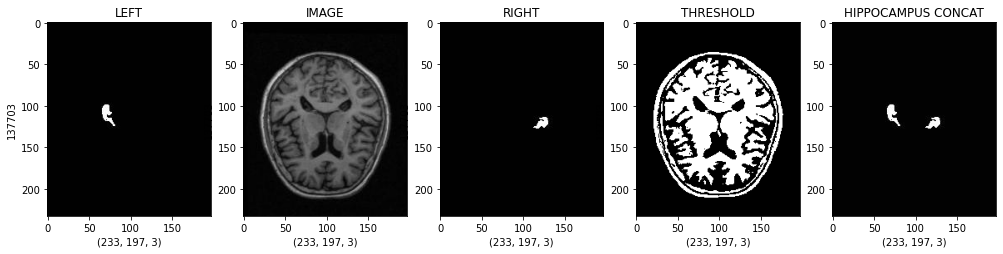

In [55]:
figure,axis = plt.subplots(1,5,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1022]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1022]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1022]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)
_,Threshold_IMG = cv2.threshold(Example_IMG,70,255,cv2.THRESH_BINARY)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Threshold_IMG.shape)
axis[3].set_ylabel(Threshold_IMG.size)
axis[3].set_title("THRESHOLD")
axis[3].imshow(Threshold_IMG)

axis[4].set_xlabel(Hıppocampus_Concat.shape)
axis[4].set_ylabel(Hıppocampus_Concat.size)
axis[4].set_title("HIPPOCAMPUS CONCAT")
axis[4].imshow(Hıppocampus_Concat)

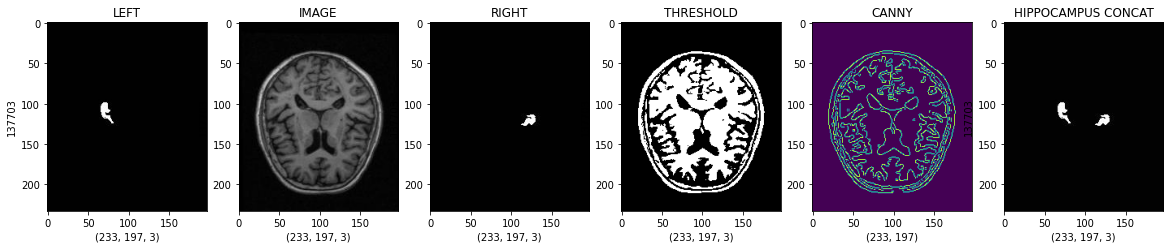

In [56]:
figure,axis = plt.subplots(1,6,figsize=(20,20))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1022]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1022]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1022]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)
_,Threshold_IMG = cv2.threshold(Example_IMG,70,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Threshold_IMG.shape)
axis[3].set_ylabel(Threshold_IMG.size)
axis[3].set_title("THRESHOLD")
axis[3].imshow(Threshold_IMG)

axis[4].set_xlabel(Canny_IMG.shape)
axis[4].set_ylabel(Canny_IMG.size)
axis[4].set_title("CANNY")
axis[4].imshow(Canny_IMG)

axis[5].set_xlabel(Hıppocampus_Concat.shape)
axis[5].set_ylabel(Hıppocampus_Concat.size)
axis[5].set_title("HIPPOCAMPUS CONCAT")
axis[5].imshow(Hıppocampus_Concat)

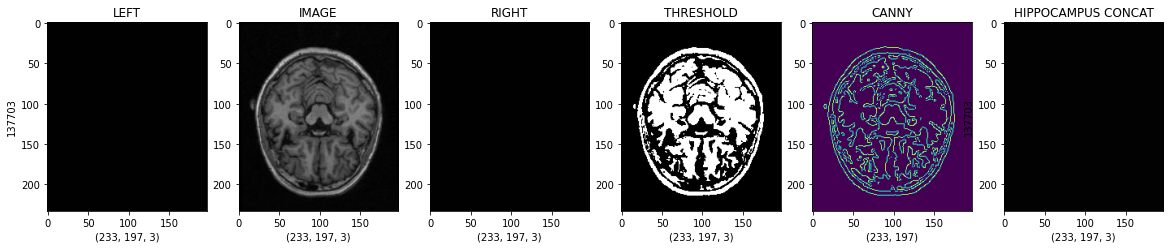

In [57]:
figure,axis = plt.subplots(1,6,figsize=(20,20))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1000]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1000]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1000]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)
_,Threshold_IMG = cv2.threshold(Example_IMG,70,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Threshold_IMG.shape)
axis[3].set_ylabel(Threshold_IMG.size)
axis[3].set_title("THRESHOLD")
axis[3].imshow(Threshold_IMG)

axis[4].set_xlabel(Canny_IMG.shape)
axis[4].set_ylabel(Canny_IMG.size)
axis[4].set_title("CANNY")
axis[4].imshow(Canny_IMG)

axis[5].set_xlabel(Hıppocampus_Concat.shape)
axis[5].set_ylabel(Hıppocampus_Concat.size)
axis[5].set_title("HIPPOCAMPUS CONCAT")
axis[5].imshow(Hıppocampus_Concat)

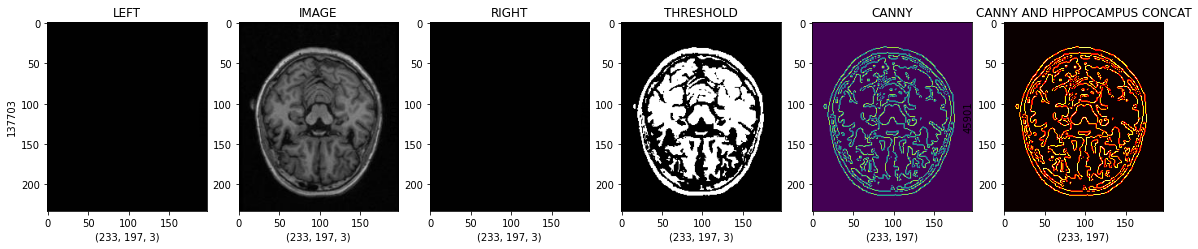

In [58]:
figure,axis = plt.subplots(1,6,figsize=(20,20))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1000]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1000]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1000]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)
_,Threshold_IMG = cv2.threshold(Example_IMG,70,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Canny_Hıppocampus_Concat = cv2.addWeighted(Canny_IMG,1,Hıppocampus_Concat[:,:,0],1,0.2)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Threshold_IMG.shape)
axis[3].set_ylabel(Threshold_IMG.size)
axis[3].set_title("THRESHOLD")
axis[3].imshow(Threshold_IMG)

axis[4].set_xlabel(Canny_IMG.shape)
axis[4].set_ylabel(Canny_IMG.size)
axis[4].set_title("CANNY")
axis[4].imshow(Canny_IMG)

axis[5].set_xlabel(Canny_Hıppocampus_Concat.shape)
axis[5].set_ylabel(Canny_Hıppocampus_Concat.size)
axis[5].set_title("CANNY AND HIPPOCAMPUS CONCAT")
axis[5].imshow(Canny_Hıppocampus_Concat,cmap="hot")

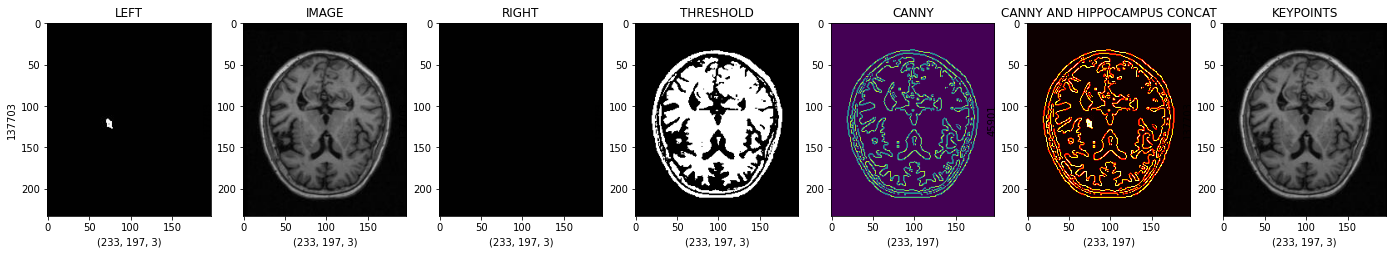

In [59]:
figure,axis = plt.subplots(1,7,figsize=(24,24))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1015]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1015]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1015]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)
_,Threshold_IMG = cv2.threshold(Example_IMG,70,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Canny_Hıppocampus_Concat = cv2.addWeighted(Canny_IMG,1,Hıppocampus_Concat[:,:,0],1,0.2)

Sift_Func = cv2.SIFT_create()
Keypoints,Descript = Sift_Func.detectAndCompute(Hıppocampus_Concat,None)
Keypoints_Out = cv2.drawKeypoints(Example_IMG,Keypoints,Canny_Hıppocampus_Concat)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Threshold_IMG.shape)
axis[3].set_ylabel(Threshold_IMG.size)
axis[3].set_title("THRESHOLD")
axis[3].imshow(Threshold_IMG)

axis[4].set_xlabel(Canny_IMG.shape)
axis[4].set_ylabel(Canny_IMG.size)
axis[4].set_title("CANNY")
axis[4].imshow(Canny_IMG)

axis[5].set_xlabel(Canny_Hıppocampus_Concat.shape)
axis[5].set_ylabel(Canny_Hıppocampus_Concat.size)
axis[5].set_title("CANNY AND HIPPOCAMPUS CONCAT")
axis[5].imshow(Canny_Hıppocampus_Concat,cmap="hot")

axis[6].set_xlabel(Keypoints_Out.shape)
axis[6].set_ylabel(Keypoints_Out.size)
axis[6].set_title("KEYPOINTS")
axis[6].imshow(Keypoints_Out)

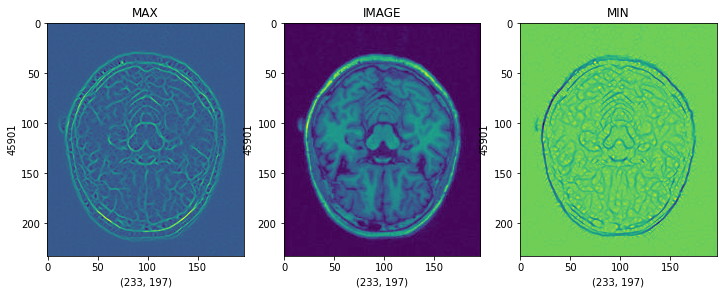

In [61]:
figure,axis = plt.subplots(1,3,figsize=(12,12))

Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1000]),cv2.COLOR_BGR2GRAY)
Hessian_IMG = hessian_matrix(Example_IMG,sigma=0.5,order="rc")
Max_IMG,Min_IMG = hessian_matrix_eigvals(Hessian_IMG)



axis[0].set_xlabel(Max_IMG.shape)
axis[0].set_ylabel(Max_IMG.size)
axis[0].set_title("MAX")
axis[0].imshow(Max_IMG)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Min_IMG.shape)
axis[2].set_ylabel(Min_IMG.size)
axis[2].set_title("MIN")
axis[2].imshow(Min_IMG)

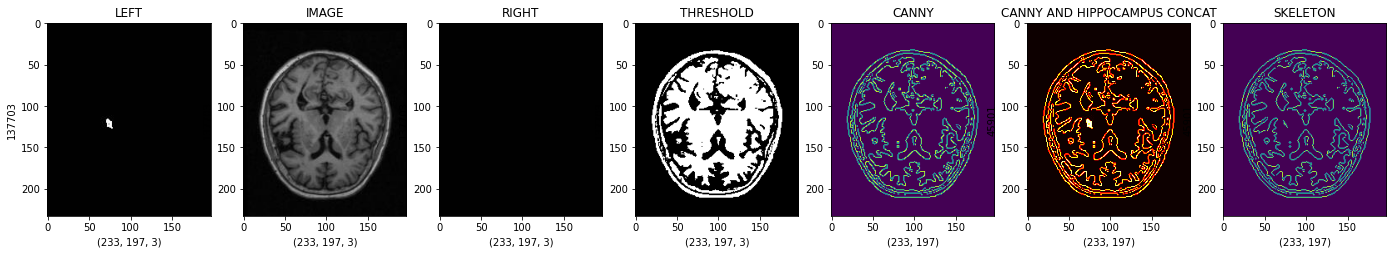

In [62]:
figure,axis = plt.subplots(1,7,figsize=(24,24))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1015]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1015]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1015]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)
_,Threshold_IMG = cv2.threshold(Example_IMG,70,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Canny_Hıppocampus_Concat = cv2.addWeighted(Canny_IMG,1,Hıppocampus_Concat[:,:,0],1,0.2)
_,Threshold_Blend = cv2.threshold(Canny_Hıppocampus_Concat,100,255,cv2.THRESH_TOZERO_INV)
Array_IMG = np.array(Canny_Hıppocampus_Concat > Threshold_Blend).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize(Array_IMG)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Threshold_IMG.shape)
axis[3].set_ylabel(Threshold_IMG.size)
axis[3].set_title("THRESHOLD")
axis[3].imshow(Threshold_IMG)

axis[4].set_xlabel(Canny_IMG.shape)
axis[4].set_ylabel(Canny_IMG.size)
axis[4].set_title("CANNY")
axis[4].imshow(Canny_IMG)

axis[5].set_xlabel(Canny_Hıppocampus_Concat.shape)
axis[5].set_ylabel(Canny_Hıppocampus_Concat.size)
axis[5].set_title("CANNY AND HIPPOCAMPUS CONCAT")
axis[5].imshow(Canny_Hıppocampus_Concat,cmap="hot")

axis[6].set_xlabel(Skeleton_IMG.shape)
axis[6].set_ylabel(Skeleton_IMG.size)
axis[6].set_title("SKELETON")
axis[6].imshow(Skeleton_IMG)

In [63]:
X_Image = []
X_Hippocampus = []

for x_image,x_l,x_r in zip(Sort_IMG,Sort_L,Sort_R):
    
    Picking_L = cv2.cvtColor(cv2.imread(x_l),cv2.COLOR_BGR2RGB)
    Picking_R = cv2.cvtColor(cv2.imread(x_r),cv2.COLOR_BGR2RGB)
    Picking_IMG = cv2.cvtColor(cv2.imread(x_image),cv2.COLOR_BGR2RGB)
    Hıppocampus_Concat = cv2.addWeighted(Picking_L,1,Picking_R,1,0.2)
    _,Threshold_IMG = cv2.threshold(Picking_IMG,70,255,cv2.THRESH_BINARY)
    Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
    Canny_Hıppocampus_Concat = cv2.addWeighted(Canny_IMG,1,Hıppocampus_Concat[:,:,0],1,0.2)
    
    Picking_IMG = Picking_IMG / 255.
    Canny_Hıppocampus_Concat = Canny_Hıppocampus_Concat / 255.
    
    X_Image.append(Picking_IMG)
    X_Hippocampus.append(Canny_Hıppocampus_Concat)

In [64]:
print("ARRAY IMAGE SHAPE: ",np.shape(np.array(X_Image)))
print("ARRAY HIPPOCAMPUS SHAPE: ",np.shape(np.array(X_Hippocampus)))

ARRAY IMAGE SHAPE:  (3213, 233, 197, 3)
ARRAY HIPPOCAMPUS SHAPE:  (3213, 233, 197)


Text(0.5, 1.0, 'TRANSFORMATION')

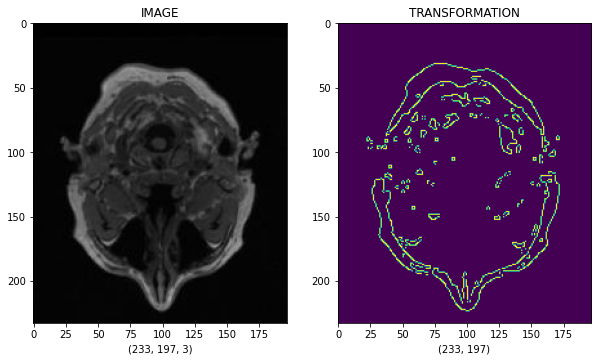

In [65]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(X_Image[10])
axis[0].set_xlabel(X_Image[10].shape)
axis[0].set_title("IMAGE")
axis[1].imshow(X_Hippocampus[10])
axis[1].set_xlabel(X_Hippocampus[10].shape)
axis[1].set_title("TRANSFORMATION")

In [66]:
Image_New = []
Hippocampus_Mask = []

for x_image,x_l,x_r in zip(Sort_IMG[:1500],Sort_L[:1500],Sort_R[:1500]):
    
    Picking_L = cv2.cvtColor(cv2.imread(x_l),cv2.COLOR_BGR2RGB)
    Picking_R = cv2.cvtColor(cv2.imread(x_r),cv2.COLOR_BGR2RGB)
    Picking_IMG = cv2.cvtColor(cv2.imread(x_image),cv2.COLOR_BGR2RGB)
    Hıppocampus_Concat = cv2.addWeighted(Picking_L,1,Picking_R,1,0.2)
    
    Picking_IMG = Picking_IMG / 255.
    Hıppocampus_Concat = Hıppocampus_Concat / 255.
    
    Image_New.append(Picking_IMG)
    Hippocampus_Mask.append(Hıppocampus_Concat)

In [67]:
print("ARRAY IMAGE SHAPE: ",np.shape(np.array(Image_New)))
print("ARRAY HIPPOCAMPUS SHAPE: ",np.shape(np.array(Hippocampus_Mask)))

ARRAY IMAGE SHAPE:  (1500, 233, 197, 3)
ARRAY HIPPOCAMPUS SHAPE:  (1500, 233, 197, 3)


In [68]:
Image_Array = np.array(X_Image,dtype="float32")
Hippocampus_Array = np.array(X_Hippocampus,dtype="float32")

In [ ]:
Image_New = np.array(Image_New,dtype="float32")
Hippocampus_Mask = np.array(Hippocampus_Mask,dtype="float32")

In [ ]:
print(type(Image_Array))
print(type(Hippocampus_Array))

In [ ]:
print(Image_Array[0].dtype)
print(Hippocampus_Array[0].dtype)

In [ ]:
Encoder_G = Sequential()
Encoder_G.add(Conv2D(32,(2,2),kernel_initializer = 'he_normal'))
Encoder_G.add(BatchNormalization())
Encoder_G.add(ReLU())
#
Encoder_G.add(Conv2D(64,(2,2),kernel_initializer = 'he_normal'))
Encoder_G.add(BatchNormalization())
Encoder_G.add(ReLU())
#
Encoder_G.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal'))
Encoder_G.add(BatchNormalization())
Encoder_G.add(ReLU())


Decoder_G = Sequential()
Decoder_G.add(Conv2DTranspose(64,(2,2)))
Decoder_G.add(ReLU())
#
Decoder_G.add(Conv2DTranspose(32,(2,2)))
Decoder_G.add(ReLU())
#
Decoder_G.add(Conv2DTranspose(1,(2,2)))
Decoder_G.add(ReLU())

In [ ]:
Auto_Encoder = Sequential([Encoder_G,Decoder_G])

In [ ]:
Auto_Encoder.compile(loss="binary_crossentropy",optimizer="adam",metrics=["mse"])

In [ ]:
Auto_Encoder_Model = Auto_Encoder.fit(Image_Array[:3000],Hippocampus_Array[:3000],epochs=25)

In [ ]:
Prediction_IMG = Auto_Encoder.predict(Image_Array[:10])

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(12,12))
prediction_img_number = 1

Original_Img = Image_Array[prediction_img_number]
Predict_Hippocampus = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Hippocampus)
axis[1].set_xlabel(Predict_Hippocampus.shape)
axis[1].set_ylabel(Predict_Hippocampus.size)
axis[1].set_title("PREDICTION")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(12,12))
prediction_img_number = 2

Original_Img = Image_Array[prediction_img_number]
Predict_Hippocampus = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Hippocampus)
axis[1].set_xlabel(Predict_Hippocampus.shape)
axis[1].set_ylabel(Predict_Hippocampus.size)
axis[1].set_title("PREDICTION")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(12,12))
prediction_img_number = 8

Original_Img = Image_Array[prediction_img_number]
Predict_Hippocampus = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Hippocampus)
axis[1].set_xlabel(Predict_Hippocampus.shape)
axis[1].set_ylabel(Predict_Hippocampus.size)
axis[1].set_title("PREDICTION")

In [ ]:
Encoder_GII = Sequential()
Encoder_GII.add(Conv2D(20,(5,5),kernel_initializer = 'he_normal',use_bias=True))
Encoder_GII.add(BatchNormalization())
Encoder_GII.add(ReLU())
#
Encoder_GII.add(Conv2D(40,(5,5),kernel_initializer = 'he_normal',use_bias=True))
Encoder_GII.add(BatchNormalization())
Encoder_GII.add(ReLU())
#
Encoder_GII.add(Conv2D(120,(5,5),kernel_initializer = 'he_normal',use_bias=True))
Encoder_GII.add(BatchNormalization())
Encoder_GII.add(ReLU())


Decoder_GII = Sequential()
Decoder_GII.add(Conv2DTranspose(40,(5,5)))
Decoder_GII.add(ReLU())
#
Decoder_GII.add(Conv2DTranspose(20,(5,5)))
Decoder_GII.add(ReLU())
#
Decoder_GII.add(Conv2DTranspose(1,(5,5)))
Decoder_GII.add(ReLU())

In [ ]:
Auto_Encoder_II = Sequential([Encoder_GII,Decoder_GII])

In [ ]:
Auto_Encoder_II.compile(loss="binary_crossentropy",optimizer=Adam(lr=0.000001),metrics=["mse"])

In [ ]:
Auto_Encoder_Model_II = Auto_Encoder_II.fit(Image_New[:1100],Hippocampus_Mask[:1100],epochs=25)

In [ ]:
Prediction_IMG_II = Auto_Encoder_II.predict(Image_New[:10])

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(12,12))
prediction_img_number = 8

Original_Img = Image_New[prediction_img_number]
Predict_Hippocampus = Prediction_IMG_II[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Hippocampus)
axis[1].set_xlabel(Predict_Hippocampus.shape)
axis[1].set_ylabel(Predict_Hippocampus.size)
axis[1].set_title("PREDICTION")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(12,12))
prediction_img_number = 1

Original_Img = Image_New[prediction_img_number]
Predict_Hippocampus = Prediction_IMG_II[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Hippocampus)
axis[1].set_xlabel(Predict_Hippocampus.shape)
axis[1].set_ylabel(Predict_Hippocampus.size)
axis[1].set_title("PREDICTION")

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(12,12))
prediction_img_number = 6

Original_Img = Image_New[prediction_img_number]
Predict_Hippocampus = Prediction_IMG_II[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Hippocampus)
axis[1].set_xlabel(Predict_Hippocampus.shape)
axis[1].set_ylabel(Predict_Hippocampus.size)
axis[1].set_title("PREDICTION")